In [1]:
#Unsupervised text clustering & unsupervised nearest-neighbor based similar text-retrieval
#Data : https://www.kaggle.com/akshatpathak/text-data-clustering/data

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cooking.csv")

In [3]:
df

,id,title,content,tags
0,1,How can I get chewy chocolate chip cookies?,<p>My chocolate chips cookies are always too c...,baking cookies texture
1,2,How should I cook bacon in an oven?,<p>I've heard of people cooking bacon in an ov...,oven cooking-time bacon
2,3,What is the difference between white and brown...,"<p>I always use brown extra large eggs, but I ...",eggs
3,4,What is the difference between baking soda and...,<p>And can I use one in place of the other in ...,substitutions please-remove-this-tag baking-so...
4,5,"In a tomato sauce recipe, how can I cut the ac...",<p>It seems that every time I make a tomato sa...,sauce pasta tomatoes italian-cuisine
...,...,...,...,...
15399,73670,Poached eggs at altitude?,<p>I recently signed up for America's Test Kit...,eggs poaching high-altitude
15400,73678,How to thicken buttercream without adding more...,<p>I made some buttercream frosting for browni...,frosting
15401,73680,Looking for old Italian recipe for chamellas,<p>My Italian mom gowould pour flour on a boar...,baking
15402,73681,Can i make ice cream with artificial sweetener,<p>I wonder if an artificial sweetener like su...,ice-cream


In [4]:
text_with_punctuation=df['content']

In [5]:
#Remove punctuation and convert to lower-case
import nltk
import string
tokenizer = nltk. RegexpTokenizer(r"\w+")

text=[]

for i in text_with_punctuation:
    new_words = tokenizer. tokenize(i)
    text.append((' '.join(new_words)).lower())

In [6]:
#Tokenize text and convert to matrices using tfidf features
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer

t=Tokenizer()
t.fit_on_texts(text)
X = t.texts_to_matrix(text, mode="tfidf")

/opt/miniconda3/envs/python2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/python2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/python2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/python2/lib/python3.7/site-packages/tensorf

In [7]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

X=np.array(X)

pca = PCA(n_components=100)
pca.fit(X)

PCA(n_components=100)

In [8]:
PCA_X=pca.transform(X)

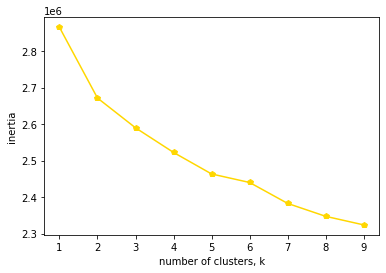

In [9]:
#Elbo method for selecting optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [10]:
#For our dataset, clustering fails to give optimal number of clusters.

In [11]:
#Nearest neighbors after PCA. Ideally this should be applied to each cluster for finding similar texts within each cluster for each text within the cluster.

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(PCA_X)

In [12]:
distances, indices = nbrs.kneighbors(PCA_X)

In [13]:
indices

array([[    0, 10685, 11655,  1472, 14932],
       [    1,  3079, 10768, 11286, 10759],
       [    2,  1495,  4189,   107,   830],
       ...,
       [15401,  6943,  7986, 13518, 14493],
       [15402, 11742,   701,  7356,   765],
       [15403, 11907, 12919,  2485, 10523]])

In [14]:
df['content'][0]

'<p>My chocolate chips cookies are always too crisp. How can I get chewy cookies, like those of Starbucks?</p>\n\n<hr>\n\n<p>Thank you to everyone who has answered. So far the tip that had the biggest impact was to chill and rest the dough, however I also increased the brown sugar ratio and increased a bit the butter. Also adding maple syrup helped. </p>\n'

In [16]:
df['content'][10685]

"<p>I made chocolate chip cookies and added too much brown sugar. The cookies are too sweet. I've used real butter and real chocolate chips. Does anyone have any ideas?</p>\n"

In [17]:
df['content'][11655]

'<p>I made cookie dough. I already put white chocolate chips and so on. I forgot to put in brown and white sugar... How can I fix this?</p>\n'

In [18]:
df['content'][2]

"<p>I always use brown extra large eggs, but I can't honestly say why I do this other than habit at this point. Are there any distinct advantages or disadvantages like flavor, shelf life, etc?</p>\n"

In [19]:
df['content'][1495]

'<p>Is there some guide I can use for cooking soft boiled ostrich eggs?</p>\n'

In [21]:
df['content'][107]

'<p>It seems that almost all meat replacements in the UK have eggs. Are there any good vegan alternatives?</p>\n'

In [22]:
df['content'][1]

"<p>I've heard of people cooking bacon in an oven by laying the strips out on a cookie sheet. When using this method, how long should I cook the bacon for, and at what temperature?</p>\n"

In [23]:
df['content'][3079]

'<p>I have never done tilapia on the grill.\nAt which temperature, and how long should I cook it?</p>\n'

In [24]:
df['content'][15401]

'<p>My Italian mom gowould pour flour on a board then place eggs in the center with salt I think vanilla  mix it with olive oil and then make round shapes and S shapes she would brush them with an egg wash and then bake them to a light golden brown. We would Dunk in milk or coffee desperately looking for the recipe thank you</p>\n'

In [25]:
df['content'][6943]

'<p>Is there any truth to coating eggs with oil, placing them in the cartons upside down and then not storing them in the refrigerator - will make them last a few months???</p>\n'

In [26]:
df['content'][7986]

"<p>My mother would dust her rising dough with flour and cover it with a dish cloth, today everyone uses oil. Which works better? What's the difference?</p>\n"